In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [123]:
g = 9.81
theta_0 = 10*(np.pi/180)
w0=0
L=1
t = np.linspace(0,0.31,100)

In [124]:
def System(r,t,g,L):
    
    theta,w= r
    
    dthetadt = w
    dwdt = ((2*g/L)-(w**2)*np.cos(theta)*np.sin(theta))/((1/3)+np.sin(theta)**2)
    
    return [dthetadt,dwdt]

In [125]:
def Integrator2(f,r0,t,g,L):
    
    h = t[1] - t[0]
    #print(h)
    
    theta = np.zeros_like(t)
    w = np.zeros_like(t)

    
    theta[0] = r0[0]
    w[0] = r0[1]

    
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    
    # Las pendientes instantaneas
    R = np.zeros(2)

    for i in range(1,len(t)):
        
        R = np.array([theta[i-1],w[i-1]])
        
        K1 = f(R,t[i-1],g,L)
        
        R = np.array([theta[i-1]+h*K1[0],w[i-1]+h*K1[1]])
        
        K2 = f(R,t[i-1]+h,g,L)
        
        theta[i] = theta[i-1] + 0.5*h*(K1[0]+K2[0])
        w[i] = w[i-1] + 0.5*h*(K1[1]+K2[1])
        
    return theta,w

In [126]:
r0 = [theta_0,w0]
theta,w = Integrator2(System,r0,t,g,L)

In [127]:
r = integrate.odeint( System, r0, t, args=(g,L))

In [128]:
y=(L/2)*np.cos(theta)
x=(L/2)*np.sin(theta)
y_=(L/2)*np.cos(r[:,0])
x_=(L/2)*np.sin(r[:,0])

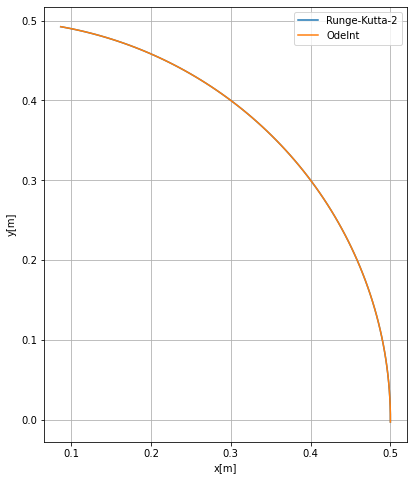

In [129]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_aspect("equal")
ax.plot(x,y, label='Runge-Kutta-2')
ax.plot(x_,y_,label='OdeInt')
plt.grid()
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.legend()

In [130]:
y

array([ 0.49240388,  0.49238088,  0.49231171,  0.49219582,  0.49203228,
        0.49181984,  0.49155687,  0.49124143,  0.49087125,  0.49044374,
        0.48995605,  0.48940508,  0.48878745,  0.48809961,  0.48733783,
        0.48649821,  0.48557677,  0.48456942,  0.48347206,  0.48228055,
        0.48099081,  0.4795988 ,  0.4781006 ,  0.4764924 ,  0.47477056,
        0.47293163,  0.47097235,  0.4688897 ,  0.46668092,  0.46434347,
        0.46187509,  0.45927382,  0.45653791,  0.45366593,  0.45065668,
        0.44750924,  0.44422291,  0.44079725,  0.43723202,  0.43352719,
        0.42968293,  0.42569959,  0.42157765,  0.41731778,  0.41292076,
        0.40838748,  0.40371893,  0.39891622,  0.39398051,  0.38891302,
        0.38371507,  0.37838797,  0.37293311,  0.36735188,  0.36164571,
        0.35581604,  0.34986433,  0.34379202,  0.33760057,  0.33129143,
        0.32486605,  0.31832585,  0.31167225,  0.30490667,  0.29803048,
        0.29104505,  0.28395174,  0.27675187,  0.26944675,  0.26

In [131]:
t[-2]

0.30686868686868685

El tiempo que la barra tarda en caer es aproximadamente 0.3 segundos